I will use Julia for executing computationally heavy tasks.

In [1]:
#import Pkg;Pkg.add("GraphMakie")

In [1]:
using CSV,DataFrames,Statistics,XLSX,RData,SimpleWeightedGraphs,GraphMakie,GLMakie,Graphs,SparseArrays
using LinearAlgebra

In [30]:
function save_sparse_matrix(M)
    I, J, V = findnz(M)
    println("I = ", I)
    df = DataFrame([:I => I, :J => J, :V => V])
    XLSX.writetable("M.xlsx", df,overwrite=true)
end

save_sparse_matrix (generic function with 1 method)

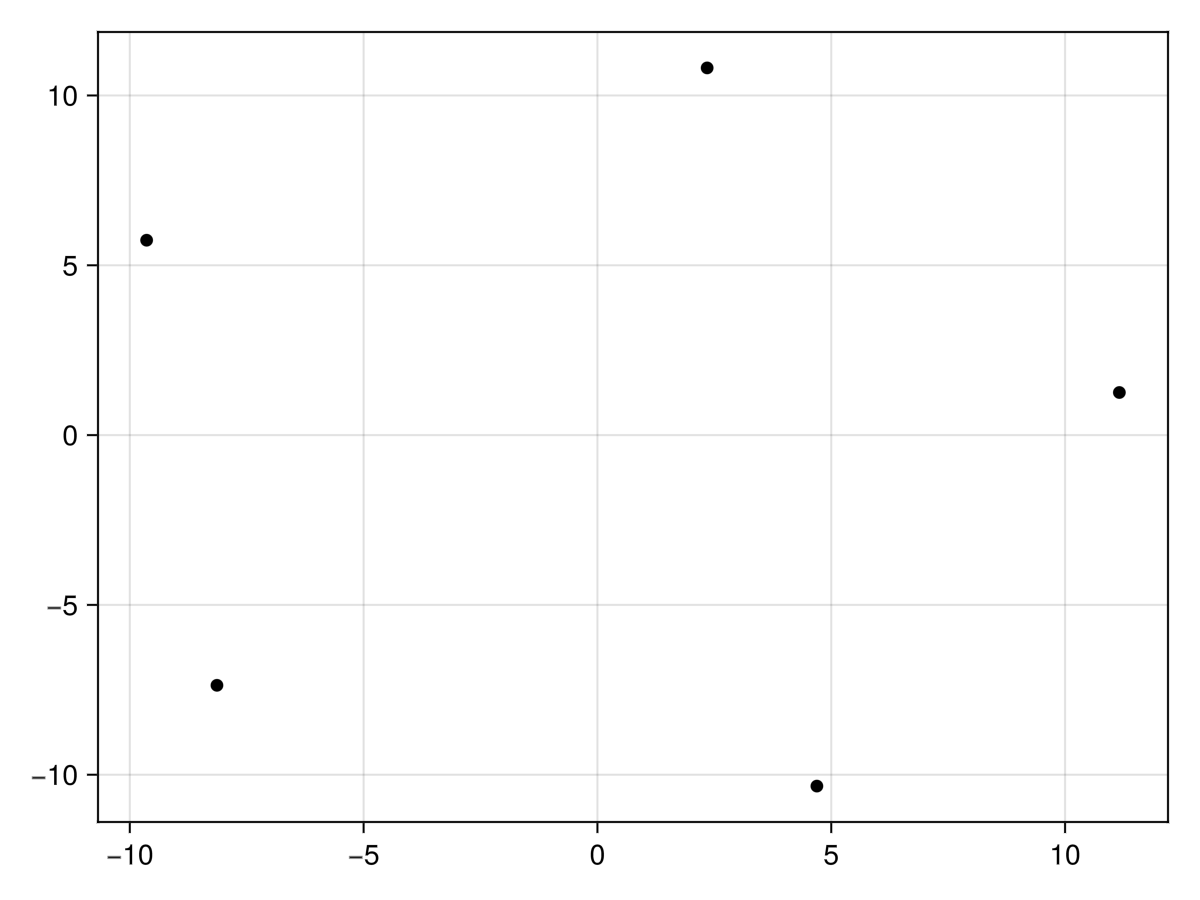

In [3]:
#m= [1 0.5 0.2;0.5 1 0;0.2 0 1]
n=5
m = zeros(Int8, n, n)
g = SimpleWeightedGraph(m)
#g = complete_graph(1000)
graphplot(g)

In [4]:
data = CSV.read("mat.csv",DataFrame)

Row,Column1,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,200010_at,200011_s_at,200012_x_at,200013_at,200014_s_at,200015_s_at,200016_x_at,200017_at,200018_at,200019_s_at,200020_at,200021_at,200022_at,200023_s_at,200024_at,200025_s_at,200026_at,200027_at,200028_s_at,200029_at,200030_s_at,200031_s_at,200032_s_at,200033_at,200034_s_at,200035_at,200036_s_at,200037_s_at,200038_s_at,200039_s_at,200040_at,200041_s_at,200042_at,200043_at,200044_at,200045_at,200046_at,200047_s_at,200048_s_at,200049_at,200050_at,200051_at,200052_s_at,200053_at,200054_at,200055_at,200056_s_at,200057_s_at,200058_s_at,200059_s_at,200060_s_at,200061_s_at,200062_s_at,200063_s_at,200064_at,200065_s_at,200066_at,200067_x_at,200068_s_at,200069_at,200070_at,200071_at,200072_s_at,200073_s_at,200074_s_at,200075_s_at,200076_s_at,200077_s_at,200078_s_at,⋯
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,GSM65752,11.4179,7.37969,7.99389,9.35875,4.53291,7.64798,6.05736,5.47629,6.6871,4.1147,9.6694,7.99231,7.27943,10.0634,9.89155,8.01871,6.36637,6.26842,9.40746,6.45325,9.47508,10.1544,12.3391,12.3054,11.597,10.4592,11.3378,10.6609,9.4321,10.9196,11.6428,9.42622,12.5268,11.8447,10.2727,10.7933,12.0571,12.0128,12.6745,11.9486,10.1242,13.2747,12.171,11.0417,11.7747,12.8855,12.3404,10.6391,10.9321,12.8946,11.9308,12.7303,12.2242,10.8683,11.8983,9.96819,11.541,9.59583,11.7824,11.1542,10.8823,11.2945,9.14793,11.8163,10.2833,9.84663,9.38208,9.80085,11.4569,8.6411,9.03307,8.30161,9.83294,9.40277,8.4619,10.7833,6.1885,11.7455,10.5743,10.3801,10.397,13.2411,12.8112,11.0137,11.5949,11.9872,8.42221,10.6337,11.6351,7.84577,8.14773,8.50226,10.0617,9.80359,10.8834,10.0228,9.10404,12.111,10.4679,⋯
2,GSM65753,11.4663,6.91519,7.31632,9.17977,4.44746,8.53438,6.09634,5.57966,6.61774,4.39963,8.57364,8.25511,7.41068,11.127,10.6794,8.14468,6.68886,6.3667,9.25701,7.03384,9.98574,11.0611,11.7233,12.797,11.2017,10.5427,11.8727,11.1631,9.22968,10.9543,12.2172,10.226,12.2545,12.0304,10.2569,10.9084,12.2664,11.6374,12.7098,12.1806,9.98055,13.2419,12.4152,11.1947,12.099,12.69,12.5317,10.7594,10.3634,12.8844,11.5295,12.9872,12.8328,11.0562,12.1173,9.77973,11.9662,9.84809,12.1838,9.8255,10.5662,11.5293,9.49535,11.2157,9.90247,9.41634,9.94862,9.14434,11.465,8.54187,9.10116,7.82882,9.54585,9.92944,7.62564,10.7509,6.05693,11.3462,10.3403,10.9822,10.2254,13.2469,12.8437,11.1109,12.0137,11.7485,9.56995,10.0039,11.6452,7.49919,8.26672,7.75478,9.94663,9.11137,11.5157,9.92894,8.60082,12.5557,10.1766,⋯
3,GSM65755,10.8436,7.3692,7.23462,9.24299,4.41917,7.60649,5.94585,5.68132,7.02815,4.64362,8.94172,8.49515,7.47461,9.89194,9.47142,8.47476,6.66676,6.28626,9.39342,6.96351,9.46264,11.7948,12.694,13.0365,11.402,10.4725,12.1706,10.9676,9.31689,10.3309,12.1643,10.6967,12.2996,12.0775,10.4371,10.4426,12.1058,11.9335,12.3742,12.4493,10.2486,13.403,12.376,10.5115,12.6104,12.5207,12.1932,10.5865,10.814,12.6624,11.6024,13.5778,12.7095,11.4141,12.1119,9.33354,11.8939,10.9945,12.0316,10.7521,10.3931,11.2813,9.91015,11.5416,10.1734,9.47013,9.9882,9.79442,11.

In [5]:
data_mat = Matrix(data[:,2:end])

91×22215 Matrix{Float64}:
 11.4179  7.37969  7.99389   9.35875  …  8.25367  7.72617  8.23019  8.06649
 11.4663  6.91519  7.31632   9.17977     8.37225  9.13574  8.0008   8.06742
 10.8436  7.3692   7.23462   9.24299     9.70972  8.93365  8.10778  8.27368
 11.7055  7.07109  7.48935   9.28159     8.26062  8.82101  8.08885  8.06792
 10.8693  6.91098  7.63431   9.30497     8.17384  8.85537  8.18354  7.98332
 11.0659  6.77683  7.25633   9.51804  …  7.37889  8.70721  8.34163  7.91243
 11.96    7.04466  7.24244   9.35393     6.38866  8.41371  8.24305  8.05576
 11.5078  6.69505  7.31372   9.20803     8.60999  8.51938  7.95272  7.65652
 11.0016  6.68412  7.80229   9.27662     7.61501  8.29543  8.04632  7.78798
 10.2883  6.9159   7.17819   9.39563     8.80902  8.50393  8.13825  7.98902
 11.1775  6.70413  7.74096   9.76162  …  7.47758  9.02949  8.20644  7.92088
 10.8412  7.49432  7.36553   9.5366      8.45546  7.44699  8.07015  8.00925
 10.5284  7.2322   7.27725   9.22269     8.53278  7.99801  8.0

In [25]:
small_cor = cor(data_mat[:,1:20])

20×20 Matrix{Float64}:
  1.0          0.170139    -0.0354973   …  -0.331791    0.296165    0.405415
  0.170139     1.0          0.00341176     -0.416148    0.582722    0.493525
 -0.0354973    0.00341176   1.0            -0.0760971   0.0681431  -0.0874351
  0.285984     0.44388      0.0908634      -0.584797    0.893788    0.393297
  0.305046     0.55241      0.0640902      -0.678154    0.919243    0.367769
  0.00587419  -0.0619298   -0.073274    …  -0.218524    0.0999916   0.219051
 -0.235268    -0.513908     0.0721048       0.5678     -0.605907   -0.498858
 -0.400885    -0.622509    -0.0573673       0.68112    -0.639928   -0.474089
 -0.432744     0.0531237    0.0790009       0.213256   -0.118826   -0.293418
  0.333061     0.555645    -0.0234054      -0.728       0.864333    0.368253
  0.126144     0.237884     0.0698139   …  -0.0265927   0.37104     0.250211
  0.307339     0.598109     0.06613        -0.610141    0.831562    0.587216
  0.150367     0.0927473    0.173785       -0.327865

In [26]:
M=sparse((small_cor .* (>).(broadcast(abs,small_cor),0.7)))
save_sparse_matrix(M)

I = [1, 2, 3, 4, 5, 10, 12, 19, 4, 5, 10, 12, 15, 19, 6, 7, 8, 15, 9, 4, 5, 10, 12, 15, 18, 19, 11, 4, 5, 10, 12, 19, 13, 14, 5, 8, 10, 15, 18, 16, 17, 19, 10, 15, 18, 4, 5, 10, 12, 17, 19, 20]


In [12]:
mat_cor = cor(data_mat)

22215×22215 Matrix{Float64}:
  1.0          0.170139    -0.0354973   …   0.151687    -0.033337
  0.170139     1.0          0.00341176      0.231387     0.272042
 -0.0354973    0.00341176   1.0             0.126342     0.0507175
  0.285984     0.44388      0.0908634       0.718006     0.140326
  0.305046     0.55241      0.0640902       0.622209     0.0871507
  0.00587419  -0.0619298   -0.073274    …   0.109122     0.00819145
 -0.235268    -0.513908     0.0721048      -0.134454    -0.0212125
 -0.400885    -0.622509    -0.0573673      -0.22771     -0.176791
 -0.432744     0.0531237    0.0790009      -0.00165781   0.0668103
  0.333061     0.555645    -0.0234054       0.566211     0.0885222
  0.126144     0.237884     0.0698139   …   0.270131     0.311941
  0.307339     0.598109     0.06613         0.532544     0.248783
  0.150367     0.0927473    0.173785        0.463673     0.162585
  ⋮                                     ⋱               
 -0.284861    -0.647271     0.0397382      -0.293

In [13]:
sizeof(mat_cor)

3948049800

It is incredibly fast! But it needs 3.7 gigabytes of RAM! What a monster! Since I'm running out of storage, I will convert it to Float16.

In [14]:
mat_cor_f16 = Float16.(mat_cor)

22215×22215 Matrix{Float16}:
  1.0        0.1702    -0.0355    …   0.1473      0.1517     -0.03333
  0.1702     1.0        0.003412     -0.446       0.2314      0.272
 -0.0355     0.003412   1.0          -0.0711      0.1263      0.05072
  0.286      0.4438     0.0909       -0.4084      0.718       0.1404
  0.305      0.5522     0.0641       -0.4656      0.622       0.08716
  0.005875  -0.06192   -0.0733    …   0.02625     0.10913     0.008194
 -0.2352    -0.5137     0.0721        0.3088     -0.1344     -0.02121
 -0.401     -0.6226    -0.05737       0.3713     -0.2277     -0.1768
 -0.4329     0.05313    0.079        -0.2269     -0.0016575   0.06683
  0.333      0.5557    -0.0234       -0.3354      0.5664      0.0885
  0.1261     0.2379     0.0698    …  -0.374       0.27        0.312
  0.3074     0.598      0.0661       -0.38        0.5327      0.2488
  0.1504     0.0928     0.1738       -0.1229      0.4636      0.1626
  ⋮                               ⋱                          
 -0.285

In [15]:
sizeof(mat_cor_f16)

987012450

In [32]:
M=sparse(mat_cor_f16 .* (>).(broadcast(abs,mat_cor_f16),0.95))
save_sparse_matrix(M)

I = [1, 6695, 8274, 2, 3, 4, 5, 3799, 6230, 6887, 6965, 7180, 7725, 7756, 8083, 10325, 10697, 10766, 10896, 10930, 13624, 13888, 14201, 14234, 14672, 14701, 14780, 14919, 14929, 15010, 15171, 15314, 15585, 15617, 15764, 15848, 15866, 15883, 16160, 16286, 16661, 16751, 16812, 17013, 17064, 18829, 19451, 19875, 20000, 20035, 20225, 20346, 20471, 21583, 6, 7, 8, 9, 4182, 10, 11, 12, 13, 13699, 14, 15, 16, 17, 18, 19, 3520, 5886, 6429, 7099, 7201, 7798, 8017, 9651, 10567, 10766, 10920, 13204, 13883, 15580, 15778, 15883, 16529, 20520, 21290, 21775, 21815, 21967, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 11656, 11922, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 5201, 5414, 5884, 6730, 7025, 7725, 7776, 8976, 9535, 10165, 10325, 12858, 13355, 14655, 14710, 15222, 15720, 15758, 15861, 15998, 16065, 16173, 16192, 16212, 167

, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 14450, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1726, 3311, 3520, 3723, 5249, 5254, 5972, 6346, 6414, 6429, 6638, 6718, 6753, 6861, 6955, 6973, 7010, 7099, 7180, 7183, 7200, 7201, 7204, 7614, 7650, 7653, 7656, 7725, 7756, 7760, 7783, 7798, 7901, 8070, 8591, 8821, 8908, 9046, 9271, 9289, 9438, 9501, 9522, 9806, 10003, 10042, 10165, 10255, 10264, 10325, 10361, 10407, 10543, 10546, 10556, 10585, 10697, 10735, 10766, 10787, 10793, 10832, 10847, 10872, 10920, 10927, 11106, 12847, 13204, 13251, 13665, 13741, 13796, 13883, 13888, 13934, 14015, 14234, 14268, 14570, 14701, 14751, 14775, 14787, 14791, 14919, 14929, 14998, 15046, 15094, 15124, 15266, 1

2531, 2532, 2533, 2534, 2535, 2536, 2537, 11157, 2538, 2539, 2540, 2541, 8320, 8329, 2542, 2543, 2544, 2545, 2546, 2547, 2810, 4411, 4710, 5201, 5254, 5262, 5884, 6230, 6588, 6638, 6718, 6730, 7025, 7183, 7450, 7564, 7656, 7725, 7905, 8821, 8976, 9046, 9201, 9289, 9501, 10003, 10042, 10165, 10239, 10325, 10697, 10793, 11106, 13355, 13741, 13796, 14015, 14066, 14655, 14780, 14992, 15124, 15252, 15266, 15720, 15777, 15861, 15883, 15893, 15956, 15998, 16065, 16192, 16203, 16212, 16286, 16357, 16545, 16709, 16731, 16922, 16971, 17064, 18704, 18786, 18829, 18953, 19451, 19635, 20082, 20273, 20295, 20634, 21074, 21654, 21741, 21800, 21873, 21896, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 10920, 14337, 15720, 16192, 19239, 2562, 13549, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 259

 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 10953, 3442, 3443, 6899, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 10689, 14866, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 4035, 13543, 15240, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 19, 756, 1410, 1726, 2795, 3311, 3520, 3723, 3788, 4075, 4080, 4425, 4527, 4665, 4710, 5044, 5091, 5142, 5249, 5254, 5262, 5395, 5497, 5565, 5590, 5672, 5818, 5879, 5972, 6019, 6050, 6230, 6334, 6346, 6414, 6429, 6430, 6476, 6497, 6562, 6588, 6627, 6638, 6718, 6746, 6753, 6787, 6798, 6861, 6887, 6895, 6921, 6955, 6973, 6990, 7010, 7099, 7133, 7180, 7183, 7

, 4155, 4156, 4157, 4158, 4159, 4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4169, 4170, 4171, 5884, 15222, 16108, 4172, 4173, 4174, 4175, 4176, 4177, 4178, 4179, 4180, 4181, 9, 4182, 4183, 4184, 4185, 4186, 4187, 4188, 21802, 4189, 4190, 4191, 4192, 4193, 4194, 4195, 4196, 4197, 8806, 4198, 4199, 4200, 4201, 4202, 4203, 4204, 4205, 4206, 4207, 4208, 4209, 4210, 4211, 4212, 4213, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 4223, 4224, 4225, 21783, 4226, 4227, 13572, 4228, 4229, 4230, 4231, 4232, 4233, 4234, 3799, 4235, 5808, 5811, 5951, 6430, 6753, 6955, 7180, 7257, 7272, 7287, 7360, 7502, 7516, 7546, 7756, 8071, 8083, 8085, 9708, 9890, 9930, 10272, 10312, 10361, 10484, 10571, 10573, 10896, 10930, 13016, 13761, 14186, 14234, 14480, 14620, 14672, 14907, 14919, 15010, 15128, 15129, 15171, 15218, 15314, 15330, 15391, 15502, 15585, 15617, 15764, 15980, 16073, 16096, 16149, 16160, 16198, 16203, 16470, 16508, 16529, 16766, 16855, 17064, 18687, 18828, 19854, 19960, 19999, 2

 10920, 10992, 12937, 13665, 13796, 14480, 14507, 14570, 14701, 14791, 15526, 15656, 16203, 16545, 16979, 18687, 19451, 20038, 20225, 20722, 20728, 21029, 21290, 21712, 21967, 4666, 4667, 4668, 4669, 4670, 3799, 4671, 5792, 6050, 6149, 6346, 6430, 6718, 6753, 6887, 7099, 7180, 7204, 7293, 7432, 7450, 7614, 7662, 7725, 7756, 7914, 8017, 9447, 10255, 10325, 10407, 10567, 10697, 10735, 10766, 10813, 10855, 10872, 10896, 10992, 13016, 13139, 13204, 13761, 13796, 13888, 14015, 14018, 14201, 14234, 14480, 14672, 14701, 14780, 14907, 14919, 14929, 15010, 15171, 15266, 15314, 15391, 15401, 15468, 15506, 15526, 15777, 15866, 15883, 16047, 16073, 16203, 16286, 16297, 16316, 16529, 16751, 16812, 16815, 17064, 18687, 19451, 19671, 19835, 19875, 19883, 20000, 20145, 20183, 20225, 20226, 20273, 20471, 20660, 20670, 20722, 21074, 21446, 21583, 21712, 21772, 4672, 4673, 4674, 4675, 4676, 4677, 4678, 4679, 4680, 4681, 4682, 4683, 4684, 11622, 4685, 4686, 4687, 4688, 4689, 4690, 4691, 4692, 4693, 4694, 

, 16074, 16082, 16096, 16143, 16149, 16153, 16157, 16160, 16192, 16198, 16203, 16271, 16286, 16297, 16311, 16316, 16357, 16379, 16416, 16442, 16471, 16482, 16490, 16508, 16529, 16545, 16573, 16580, 16633, 16661, 16693, 16709, 16731, 16751, 16754, 16766, 16812, 16815, 16817, 16819, 16836, 16855, 16875, 16880, 16896, 16900, 16922, 16926, 16971, 16979, 17013, 17064, 17419, 18117, 18687, 18704, 18786, 18829, 18953, 19251, 19301, 19344, 19358, 19442, 19451, 19520, 19593, 19635, 19652, 19689, 19742, 19798, 19802, 19835, 19854, 19875, 19903, 19908, 19949, 19960, 20000, 20035, 20038, 20081, 20082, 20145, 20181, 20186, 20225, 20226, 20227, 20264, 20273, 20278, 20295, 20327, 20346, 20374, 20455, 20470, 20471, 20601, 20702, 20718, 20722, 20728, 20784, 20814, 21029, 21074, 21079, 21277, 21290, 21307, 21364, 21432, 21446, 21545, 21549, 21583, 21607, 21655, 21678, 21712, 21714, 21722, 21741, 21800, 21855, 21873, 21967, 5092, 5093, 5094, 5095, 5096, 5097, 5098, 5099, 5100, 5101, 5102, 5103, 5104, 510

, 19903, 19960, 20000, 20038, 20081, 20082, 20145, 20172, 20181, 20183, 20186, 20195, 20225, 20226, 20227, 20264, 20273, 20295, 20325, 20346, 20439, 20470, 20471, 20474, 20601, 20690, 20718, 20722, 20728, 20814, 20820, 20826, 21029, 21074, 21079, 21277, 21290, 21307, 21356, 21364, 21446, 21545, 21547, 21549, 21583, 21607, 21631, 21654, 21655, 21678, 21696, 21712, 21714, 21722, 21741, 21799, 21800, 21855, 21873, 21896, 21967, 5255, 5256, 5257, 5258, 5259, 5260, 5261, 756, 1585, 2547, 3006, 3520, 3723, 4411, 4527, 4710, 5091, 5142, 5201, 5254, 5262, 5362, 5414, 5448, 5565, 5590, 5884, 5972, 6033, 6050, 6085, 6104, 6230, 6334, 6346, 6486, 6588, 6638, 6718, 6730, 6787, 6955, 7010, 7067, 7117, 7180, 7183, 7233, 7257, 7272, 7293, 7432, 7450, 7564, 7591, 7614, 7653, 7656, 7725, 7756, 7842, 7901, 7905, 7914, 7986, 8070, 8591, 8622, 8821, 8976, 9012, 9046, 9135, 9201, 9271, 9289, 9447, 9501, 9561, 9708, 9774, 10003, 10042, 10100, 10165, 10185, 10255, 10264, 10325, 10407, 10697, 10706, 10727, 10

, 10185, 10232, 10255, 10264, 10312, 10325, 10361, 10407, 10571, 10697, 10706, 10727, 10766, 10793, 10832, 10872, 10896, 10903, 10920, 10930, 10932, 10992, 11558, 11862, 12587, 13016, 13190, 13204, 13342, 13355, 13516, 13537, 13665, 13741, 13761, 13772, 13796, 13888, 13934, 13942, 14015, 14066, 14201, 14234, 14268, 14290, 14337, 14359, 14507, 14525, 14570, 14571, 14655, 14672, 14682, 14690, 14701, 14710, 14751, 14775, 14780, 14791, 14919, 14920, 14929, 14998, 15028, 15046, 15094, 15124, 15171, 15252, 15266, 15295, 15314, 15391, 15401, 15417, 15456, 15506, 15526, 15543, 15585, 15617, 15648, 15656, 15688, 15720, 15733, 15739, 15758, 15765, 15777, 15861, 15866, 15883, 15893, 15956, 15980, 15998, 16047, 16065, 16073, 16074, 16143, 16160, 16192, 16203, 16271, 16286, 16311, 16316, 16357, 16379, 16490, 16545, 16580, 16633, 16693, 16709, 16731, 16751, 16766, 16812, 16875, 16896, 16922, 16971, 17013, 17064, 18382, 18649, 18687, 18704, 18786, 18829, 19063, 19239, 19301, 19344, 19358, 19442, 1945

 15883, 15893, 15903, 15956, 15980, 15998, 16029, 16047, 16049, 16065, 16073, 16074, 16096, 16128, 16149, 16160, 16192, 16198, 16203, 16286, 16316, 16357, 16379, 16408, 16412, 16442, 16471, 16483, 16508, 16529, 16545, 16661, 16668, 16693, 16731, 16751, 16754, 16766, 16812, 16817, 16819, 16849, 16855, 16875, 16880, 16896, 16900, 16948, 16971, 17013, 17064, 18687, 18786, 19069, 19267, 19301, 19344, 19358, 19451, 19635, 19697, 19798, 19802, 19835, 19854, 19867, 19875, 19883, 19960, 19984, 20000, 20035, 20038, 20082, 20145, 20172, 20181, 20183, 20186, 20195, 20225, 20227, 20255, 20273, 20284, 20295, 20346, 20374, 20439, 20455, 20470, 20474, 20600, 20601, 20690, 20702, 20722, 20728, 20814, 20820, 21029, 21074, 21079, 21290, 21432, 21446, 21545, 21583, 21607, 21618, 21655, 21678, 21712, 21714, 21741, 21772, 21800, 5812, 5813, 5814, 5815, 5816, 5817, 1726, 3066, 3153, 3520, 3723, 4075, 4527, 4560, 4916, 5091, 5157, 5202, 5249, 5254, 5448, 5565, 5694, 5808, 5811, 5818, 5879, 5972, 6005, 6050, 

, 21678, 21696, 21712, 21722, 21741, 21743, 21799, 21800, 21815, 21855, 21873, 21896, 21967, 5973, 5974, 3799, 5091, 5811, 5898, 5975, 6230, 6430, 6588, 6887, 6955, 6965, 7505, 7725, 7756, 7798, 8083, 8085, 9447, 9501, 9890, 10175, 10303, 10567, 10697, 10766, 10896, 10992, 13204, 13627, 13883, 14201, 14234, 14701, 14780, 14907, 14919, 14929, 15171, 15342, 15526, 15585, 15617, 15777, 15883, 16073, 16160, 16203, 16286, 16661, 16812, 16855, 16971, 17013, 17064, 18828, 19451, 20000, 20195, 20225, 20227, 20273, 20470, 20722, 21074, 21277, 21712, 21772, 5976, 5977, 5978, 15477, 5979, 5980, 5981, 5982, 5983, 5984, 5985, 5986, 5987, 10865, 5988, 5989, 5990, 5991, 5992, 5993, 5994, 5995, 15752, 5996, 5997, 5998, 5999, 6000, 6001, 6002, 6003, 6004, 756, 3723, 4527, 5091, 5249, 5254, 5808, 5811, 5818, 5972, 6005, 6230, 6499, 6588, 6638, 6753, 6787, 6955, 6969, 7257, 7272, 7293, 7432, 7505, 7614, 7653, 7656, 7725, 7756, 7842, 7901, 8083, 9271, 9501, 9522, 9708, 9928, 9976, 10211, 10232, 10255, 102

10407, 10498, 10521, 10543, 10546, 10556, 10571, 10585, 10697, 10706, 10727, 10735, 10766, 10787, 10793, 10813, 10826, 10832, 10847, 10855, 10872, 10896, 10903, 10920, 10927, 10932, 10992, 11042, 11106, 11123, 11245, 11862, 12497, 12587, 12847, 12858, 13016, 13090, 13097, 13119, 13139, 13190, 13204, 13251, 13344, 13355, 13370, 13586, 13617, 13665, 13724, 13741, 13761, 13772, 13796, 13857, 13883, 13888, 13934, 13942, 13966, 14009, 14015, 14018, 14051, 14066, 14201, 14231, 14234, 14268, 14290, 14337, 14359, 14473, 14480, 14507, 14525, 14536, 14570, 14571, 14655, 14672, 14682, 14690, 14701, 14751, 14775, 14776, 14780, 14783, 14787, 14791, 14816, 14867, 14907, 14919, 14920, 14929, 14998, 15010, 15046, 15047, 15094, 15124, 15171, 15225, 15232, 15235, 15242, 15244, 15252, 15266, 15284, 15295, 15314, 15368, 15391, 15401, 15417, 15439, 15506, 15526, 15539, 15543, 15570, 15580, 15585, 15586, 15617, 15630, 15648, 15656, 15720, 15733, 15739, 15749, 15758, 15764, 15765, 15777, 15778, 15789, 15825,

20226, 20227, 20264, 20273, 20327, 20346, 20439, 20471, 20722, 20728, 21029, 21074, 21079, 21277, 21290, 21307, 21549, 21583, 21655, 21678, 21696, 21712, 21741, 21800, 21855, 21873, 21967, 6477, 5808, 5811, 6206, 6478, 6993, 7117, 7656, 7842, 8083, 9708, 9868, 9967, 10211, 10499, 10697, 10896, 10903, 14304, 14672, 15010, 15840, 16160, 20455, 21714, 6479, 6480, 6481, 6482, 6483, 6484, 6485, 756, 1585, 4411, 4710, 5254, 5262, 5414, 5884, 6230, 6346, 6486, 6730, 7257, 7293, 7450, 7653, 7656, 7725, 7842, 7905, 7914, 8821, 8976, 9046, 9135, 9201, 9271, 9501, 9708, 10003, 10165, 10264, 10325, 10407, 10697, 10793, 10832, 13190, 13317, 13355, 13516, 13741, 13796, 13942, 14015, 14066, 14290, 14525, 14536, 14570, 14655, 14672, 14682, 14710, 14751, 14791, 14919, 14920, 15124, 15223, 15252, 15266, 15295, 15466, 15485, 15506, 15586, 15617, 15720, 15733, 15893, 15998, 16065, 16067, 16074, 16160, 16203, 16379, 16386, 16490, 16545, 16633, 16693, 16709, 16731, 16766, 16971, 17024, 17064, 18382, 18704, 

16875, 16880, 16896, 16900, 16922, 16971, 17064, 18117, 18382, 18687, 18704, 18786, 18829, 18953, 19063, 19228, 19301, 19451, 19520, 19550, 19593, 19635, 19742, 19798, 19835, 19854, 19875, 19903, 19960, 20000, 20038, 20082, 20145, 20181, 20225, 20226, 20227, 20273, 20278, 20295, 20327, 20346, 20424, 20470, 20471, 20564, 20669, 20722, 20728, 20746, 21029, 21074, 21290, 21307, 21356, 21364, 21432, 21545, 21583, 21584, 21607, 21678, 21712, 21741, 21799, 21800, 21855, 21873, 21896, 21967, 6639, 6640, 6641, 6642, 6643, 6644, 6645, 6646, 6647, 6648, 6649, 6650, 6651, 4059, 5620, 6652, 14499, 6653, 6654, 6655, 6656, 6657, 7788, 9405, 10829, 6658, 6659, 7750, 17044, 5210, 6660, 9568, 14756, 15845, 6661, 21696, 6662, 6663, 6664, 6665, 6666, 6667, 6668, 6669, 6670, 6671, 6672, 6673, 6674, 6675, 6676, 6677, 6678, 6679, 6680, 6730, 7776, 19581, 6681, 6682, 6683, 6684, 6685, 6686, 6687, 6688, 6689, 6690, 6691, 6692, 6693, 10361, 14507, 14570, 16164, 19464, 6694, 1, 6695, 6696, 6697, 6698, 6699, 670

7653, 7656, 7725, 7756, 7760, 7783, 7798, 7822, 7842, 7901, 7905, 7914, 7969, 7986, 8070, 8071, 8083, 8591, 8821, 8976, 9012, 9046, 9201, 9271, 9289, 9305, 9438, 9447, 9501, 9522, 9535, 9561, 9679, 9708, 9806, 9868, 9928, 9930, 9942, 9967, 10003, 10026, 10042, 10100, 10165, 10175, 10176, 10185, 10187, 10211, 10232, 10255, 10264, 10272, 10312, 10325, 10361, 10407, 10537, 10546, 10571, 10573, 10697, 10706, 10727, 10735, 10766, 10787, 10793, 10813, 10832, 10872, 10896, 10903, 10920, 10927, 10930, 10932, 10992, 11106, 11173, 11558, 11644, 11862, 12497, 12587, 12839, 12847, 12937, 13016, 13190, 13204, 13317, 13342, 13344, 13355, 13370, 13516, 13537, 13617, 13641, 13741, 13755, 13761, 13772, 13796, 13888, 13934, 13942, 14015, 14051, 14066, 14186, 14201, 14231, 14234, 14290, 14337, 14351, 14471, 14480, 14507, 14525, 14536, 14570, 14571, 14620, 14655, 14672, 14682, 14690, 14701, 14710, 14751, 14772, 14775, 14780, 14787, 14791, 14816, 14848, 14867, 14880, 14907, 14919, 14920, 14929, 14992, 1499

, 7099, 7133, 7169, 7180, 7200, 7201, 7412, 7437, 7614, 7725, 7756, 7760, 7783, 7798, 7930, 8083, 9438, 9928, 10042, 10211, 10255, 10484, 10567, 10697, 10766, 10826, 10872, 10896, 10903, 10920, 12982, 13187, 13204, 13617, 13627, 13796, 13883, 13888, 14201, 14234, 14701, 14780, 14907, 15094, 15171, 15401, 15780, 15789, 15848, 15866, 15883, 15893, 16160, 16286, 16316, 16483, 16529, 16668, 16812, 16815, 16849, 16880, 19654, 19737, 19854, 19875, 20000, 20035, 20225, 20227, 20273, 20327, 20600, 20669, 20722, 21029, 21290, 21432, 21583, 21607, 21712, 3799, 4757, 5808, 5811, 5951, 6063, 6206, 6226, 6230, 6476, 6823, 6932, 6955, 7067, 7133, 7180, 7227, 7257, 7389, 7412, 7653, 7656, 7725, 7756, 7842, 7883, 7914, 9708, 9928, 9967, 10361, 10571, 10573, 10697, 10896, 11862, 13016, 13190, 13796, 13908, 14186, 14201, 14234, 14571, 14672, 14701, 14735, 14780, 14907, 14919, 14920, 14962, 15010, 15171, 15178, 15252, 15266, 15295, 15314, 15330, 15391, 15401, 15485, 15543, 15585, 15586, 15617, 15733, 157

, 7614, 7650, 7653, 7656, 7725, 7756, 7760, 7798, 7842, 7901, 7914, 7969, 7980, 7986, 8070, 8591, 8821, 8976, 9046, 9201, 9271, 9289, 9305, 9424, 9438, 9447, 9501, 9522, 9561, 9708, 9806, 9928, 9930, 10003, 10042, 10165, 10255, 10264, 10325, 10407, 10543, 10546, 10556, 10697, 10706, 10727, 10735, 10766, 10793, 10813, 10832, 10855, 10896, 10920, 10927, 10932, 10992, 11106, 11123, 11281, 12587, 12858, 13204, 13344, 13370, 13537, 13665, 13741, 13761, 13796, 13883, 13888, 13934, 13942, 14015, 14231, 14234, 14268, 14290, 14337, 14351, 14480, 14507, 14525, 14570, 14655, 14682, 14701, 14751, 14775, 14780, 14787, 14791, 14919, 14929, 14998, 15003, 15046, 15094, 15124, 15232, 15242, 15252, 15266, 15368, 15391, 15401, 15417, 15506, 15570, 15648, 15720, 15733, 15739, 15749, 15758, 15765, 15777, 15861, 15866, 15883, 15893, 15956, 15998, 16047, 16065, 16073, 16074, 16143, 16192, 16203, 16256, 16257, 16259, 16271, 16286, 16297, 16311, 16316, 16318, 16344, 16376, 16379, 16416, 16440, 16471, 16482, 16

 12497, 12839, 13016, 13187, 13190, 13204, 13344, 13516, 13586, 13617, 13741, 13761, 13772, 13796, 13883, 13888, 13913, 13942, 14015, 14186, 14201, 14231, 14234, 14471, 14480, 14525, 14570, 14620, 14672, 14682, 14690, 14694, 14701, 14780, 14791, 14848, 14907, 14919, 14920, 14929, 14998, 15010, 15028, 15094, 15124, 15128, 15142, 15171, 15178, 15235, 15244, 15252, 15295, 15314, 15391, 15401, 15417, 15450, 15506, 15543, 15585, 15617, 15648, 15720, 15733, 15739, 15764, 15765, 15778, 15789, 15840, 15866, 15883, 15893, 15956, 15980, 16047, 16065, 16073, 16074, 16096, 16143, 16160, 16192, 16203, 16286, 16316, 16357, 16379, 16471, 16482, 16529, 16545, 16573, 16661, 16668, 16691, 16693, 16731, 16751, 16754, 16766, 16812, 16817, 16836, 16855, 16875, 16880, 16900, 16922, 16948, 16971, 16979, 17013, 17064, 18687, 18704, 18786, 18829, 19301, 19451, 19562, 19635, 19689, 19802, 19835, 19854, 19908, 19960, 20000, 20035, 20038, 20082, 20145, 20181, 20186, 20225, 20226, 20227, 20273, 20295, 20327, 20346

, 7293, 7412, 7433, 7450, 7505, 7517, 7614, 7653, 7656, 7662, 7725, 7726, 7756, 7760, 7783, 7798, 7842, 7901, 7914, 7939, 7969, 7986, 8070, 8085, 8086, 8591, 8821, 9046, 9271, 9289, 9438, 9501, 9522, 9708, 9774, 9919, 9928, 9930, 9991, 10003, 10026, 10042, 10100, 10165, 10175, 10176, 10185, 10255, 10264, 10325, 10361, 10407, 10543, 10546, 10556, 10571, 10697, 10706, 10727, 10735, 10766, 10787, 10793, 10812, 10813, 10826, 10832, 10855, 10872, 10896, 10920, 10930, 10992, 11106, 11123, 11311, 13016, 13097, 13139, 13190, 13204, 13344, 13370, 13516, 13586, 13665, 13741, 13761, 13796, 13857, 13888, 13934, 13942, 14015, 14186, 14201, 14234, 14268, 14337, 14480, 14507, 14525, 14570, 14672, 14701, 14751, 14780, 14791, 14907, 14919, 14920, 14929, 14998, 15010, 15094, 15124, 15178, 15244, 15252, 15266, 15295, 15314, 15368, 15390, 15391, 15401, 15447, 15506, 15526, 15585, 15586, 15617, 15648, 15720, 15733, 15749, 15764, 15765, 15777, 15825, 15848, 15866, 15883, 15893, 15956, 15980, 15987, 16047, 1

14929, 15010, 15083, 15094, 15142, 15171, 15178, 15218, 15244, 15266, 15295, 15314, 15368, 15391, 15401, 15506, 15526, 15543, 15585, 15617, 15720, 15764, 15840, 15866, 15883, 15956, 15980, 16073, 16074, 16096, 16143, 16160, 16198, 16203, 16286, 16412, 16483, 16508, 16529, 16661, 16693, 16731, 16766, 16812, 16849, 16855, 16875, 16896, 16926, 16971, 16979, 17013, 17064, 18687, 18729, 18786, 18828, 19301, 19328, 19451, 19635, 19671, 19802, 19835, 19875, 19908, 19960, 20000, 20038, 20082, 20145, 20172, 20181, 20195, 20225, 20226, 20273, 20346, 20471, 20601, 20722, 20728, 21029, 21074, 21079, 21356, 21432, 21446, 21583, 21655, 21678, 21712, 21714, 7288, 7289, 7290, 7291, 7292, 756, 1726, 2795, 3066, 3520, 3723, 3788, 3799, 4026, 4075, 4527, 4665, 4671, 4710, 4757, 5091, 5157, 5202, 5249, 5254, 5262, 5414, 5448, 5565, 5590, 5694, 5792, 5808, 5811, 5818, 5879, 5898, 5951, 5972, 6005, 6050, 6135, 6206, 6230, 6334, 6346, 6414, 6429, 6430, 6476, 6486, 6497, 6499, 6588, 6638, 6718, 6746, 6753, 67

 15128, 15171, 15252, 15266, 15295, 15368, 15391, 15401, 15417, 15456, 15468, 15506, 15526, 15543, 15585, 15617, 15648, 15656, 15720, 15733, 15739, 15764, 15765, 15777, 15840, 15848, 15866, 15883, 15893, 15903, 15956, 15998, 16047, 16065, 16073, 16074, 16096, 16143, 16157, 16160, 16192, 16203, 16257, 16271, 16286, 16297, 16311, 16316, 16357, 16379, 16416, 16471, 16482, 16490, 16508, 16545, 16580, 16633, 16661, 16693, 16709, 16731, 16751, 16754, 16766, 16774, 16812, 16815, 16819, 16836, 16875, 16896, 16971, 17013, 17064, 17419, 18687, 18704, 18786, 18829, 19063, 19301, 19344, 19358, 19451, 19635, 19649, 19798, 19802, 19835, 19854, 19875, 19879, 19903, 19960, 20000, 20038, 20081, 20082, 20145, 20181, 20186, 20225, 20226, 20264, 20273, 20278, 20295, 20327, 20470, 20718, 20722, 20728, 20814, 20825, 21029, 21074, 21277, 21290, 21364, 21446, 21545, 21549, 21583, 21655, 21678, 21712, 21741, 21743, 21800, 21855, 21873, 21896, 21967, 756, 2795, 3520, 3723, 3799, 4527, 4710, 4916, 5091, 5202, 52

 14655, 14682, 14700, 14751, 14791, 15035, 15046, 15091, 15124, 15208, 15222, 15252, 15266, 15417, 15720, 15749, 15758, 15765, 15777, 15861, 15893, 15998, 16065, 16074, 16108, 16173, 16192, 16272, 16286, 16357, 16376, 16379, 16405, 16416, 16440, 16490, 16545, 16633, 16693, 16709, 16729, 16731, 16733, 16747, 16751, 16863, 16896, 16922, 18382, 18704, 18786, 18829, 18929, 18953, 19063, 19451, 19835, 20038, 20082, 20273, 20634, 20706, 20722, 20728, 21029, 21074, 21290, 21307, 21654, 21677, 21678, 21741, 21800, 21855, 21873, 21896, 21967, 7565, 7566, 7567, 6955, 7568, 10030, 16203, 7569, 7570, 7571, 7572, 5201, 5884, 6529, 6573, 6730, 7025, 7523, 7573, 13918, 14655, 15035, 15208, 15222, 16108, 16113, 16212, 16426, 16728, 16863, 19581, 20458, 20634, 7574, 7575, 7576, 7577, 7578, 7579, 7580, 7581, 7582, 7583, 7584, 7585, 7586, 7587, 7588, 7589, 7590, 4411, 4710, 5254, 5262, 5414, 5884, 6730, 6787, 6808, 6888, 7591, 7661, 7725, 7750, 8976, 9127, 9271, 9369, 9501, 10165, 10185, 10571, 10573, 10

 9930, 9942, 9967, 9991, 10003, 10026, 10042, 10100, 10165, 10175, 10176, 10185, 10189, 10211, 10232, 10255, 10264, 10325, 10358, 10361, 10407, 10484, 10499, 10537, 10546, 10571, 10573, 10585, 10697, 10706, 10727, 10735, 10766, 10793, 10813, 10832, 10847, 10855, 10872, 10896, 10903, 10920, 10930, 10932, 10992, 11106, 11245, 11281, 11311, 11558, 11862, 12497, 12587, 12839, 12847, 12937, 13016, 13077, 13090, 13190, 13204, 13317, 13342, 13344, 13355, 13370, 13516, 13537, 13594, 13617, 13665, 13741, 13755, 13761, 13772, 13796, 13883, 13888, 13934, 13942, 13966, 14015, 14018, 14051, 14066, 14186, 14201, 14231, 14234, 14268, 14279, 14290, 14337, 14471, 14480, 14507, 14525, 14536, 14570, 14571, 14655, 14672, 14682, 14690, 14701, 14735, 14736, 14751, 14780, 14787, 14791, 14816, 14867, 14880, 14907, 14919, 14920, 14929, 14998, 15010, 15028, 15046, 15083, 15094, 15124, 15128, 15171, 15178, 15225, 15244, 15251, 15252, 15266, 15295, 15314, 15363, 15391, 15401, 15402, 15417, 15447, 15456, 15466, 15

 5811, 5818, 5879, 5972, 6019, 6050, 6230, 6334, 6346, 6414, 6429, 6476, 6497, 6588, 6638, 6718, 6746, 6753, 6787, 6798, 6835, 6861, 6887, 6922, 6931, 6955, 6973, 6993, 7010, 7015, 7067, 7099, 7133, 7180, 7183, 7200, 7201, 7204, 7215, 7257, 7293, 7307, 7389, 7412, 7432, 7433, 7437, 7450, 7505, 7614, 7650, 7653, 7656, 7725, 7756, 7760, 7779, 7783, 7798, 7822, 7833, 7842, 7901, 7914, 7969, 7986, 7993, 7999, 8017, 8027, 8070, 8083, 8591, 8821, 8976, 9046, 9201, 9271, 9289, 9438, 9501, 9522, 9535, 9548, 9708, 9868, 9928, 9930, 9967, 10003, 10026, 10042, 10165, 10189, 10211, 10232, 10255, 10264, 10325, 10361, 10407, 10521, 10543, 10546, 10556, 10585, 10697, 10706, 10735, 10766, 10793, 10813, 10826, 10832, 10847, 10872, 10896, 10903, 10920, 10927, 10930, 10932, 10992, 11106, 12587, 12839, 12847, 13090, 13204, 13344, 13355, 13370, 13537, 13617, 13627, 13665, 13741, 13761, 13796, 13883, 13888, 13934, 13966, 14015, 14018, 14066, 14201, 14234, 14268, 14290, 14337, 14471, 14473, 14480, 14507, 145

, 7272, 7293, 7389, 7412, 7432, 7433, 7450, 7505, 7614, 7650, 7653, 7656, 7725, 7756, 7760, 7783, 7798, 7842, 7901, 7914, 7939, 7969, 7986, 7993, 8071, 8083, 8591, 8821, 8863, 8976, 9046, 9201, 9271, 9447, 9501, 9535, 9679, 9708, 9868, 9919, 9928, 9930, 9942, 9967, 9994, 10003, 10026, 10042, 10165, 10176, 10232, 10255, 10264, 10272, 10325, 10361, 10407, 10537, 10543, 10571, 10697, 10735, 10766, 10793, 10813, 10832, 10847, 10872, 10896, 10903, 10920, 10927, 10930, 10932, 10992, 11106, 11558, 11862, 12497, 12587, 12839, 13016, 13190, 13204, 13370, 13537, 13617, 13627, 13665, 13741, 13761, 13796, 13883, 13888, 13942, 13966, 14015, 14018, 14066, 14186, 14201, 14212, 14234, 14290, 14337, 14471, 14480, 14507, 14525, 14570, 14571, 14672, 14682, 14690, 14701, 14735, 14736, 14780, 14791, 14867, 14907, 14919, 14920, 14929, 14998, 15010, 15020, 15028, 15046, 15083, 15094, 15124, 15128, 15142, 15171, 15178, 15225, 15252, 15266, 15295, 15314, 15391, 15401, 15417, 15450, 15466, 15485, 15506, 15526, 

, 13761, 13796, 13908, 14015, 14186, 14201, 14212, 14234, 14507, 14525, 14570, 14571, 14672, 14701, 14736, 14780, 14919, 15010, 15171, 15178, 15391, 15468, 15502, 15506, 15526, 15543, 15585, 15617, 15866, 15980, 16047, 16073, 16074, 16143, 16160, 16203, 16286, 16693, 16766, 16812, 16971, 17064, 18687, 19451, 19960, 20145, 20181, 20523, 20814, 20820, 21074, 21583, 21655, 21712, 21714, 7947, 9806, 13934, 21800, 7948, 7949, 13807, 7950, 7951, 7952, 7953, 19581, 7954, 7955, 7956, 7957, 7958, 7959, 7960, 7961, 7962, 5091, 6230, 6430, 6955, 7099, 7505, 7963, 9271, 9930, 10042, 10930, 10992, 13204, 13594, 14701, 14780, 15010, 15171, 16160, 16316, 16661, 16731, 16812, 16900, 16971, 19451, 19854, 19875, 19908, 20226, 20722, 20784, 21029, 21583, 7964, 7965, 7966, 7967, 7968, 756, 1726, 2795, 3520, 3723, 4527, 4710, 5091, 5249, 5254, 5448, 5792, 5811, 5972, 6050, 6230, 6346, 6429, 6497, 6588, 6638, 6753, 6787, 6798, 6887, 6899, 6955, 7010, 7015, 7067, 7099, 7133, 7180, 7183, 7200, 7204, 7215, 725

, 10573, 10637, 10697, 10766, 10787, 10812, 10832, 10872, 10896, 10930, 10992, 11558, 11862, 12839, 12937, 13016, 13190, 13315, 13342, 13370, 13516, 13761, 13796, 13908, 13942, 14051, 14066, 14186, 14201, 14234, 14290, 14471, 14480, 14507, 14525, 14570, 14620, 14672, 14682, 14690, 14780, 14791, 14822, 14907, 14919, 14920, 14929, 14962, 15010, 15083, 15124, 15171, 15178, 15218, 15244, 15295, 15314, 15342, 15368, 15391, 15401, 15456, 15485, 15506, 15526, 15547, 15585, 15617, 15720, 15733, 15764, 15848, 15866, 15883, 15893, 15980, 16047, 16073, 16096, 16160, 16164, 16198, 16203, 16286, 16301, 16412, 16470, 16508, 16529, 16661, 16766, 16812, 16849, 16855, 16926, 16968, 16971, 17013, 17064, 18687, 18828, 19344, 19358, 19389, 19451, 19652, 19742, 19798, 19854, 19960, 20000, 20035, 20081, 20145, 20226, 20295, 20346, 20374, 20470, 20523, 20702, 20722, 20814, 21029, 21074, 21277, 21364, 21446, 21545, 21583, 21655, 21678, 21696, 21712, 21714, 21722, 21772, 8072, 8073, 8074, 8075, 8076, 8025, 807

 8694, 8695, 11307, 8696, 8697, 8698, 8699, 8700, 8701, 8702, 8703, 8704, 8705, 8706, 8707, 8708, 8709, 8710, 8711, 8712, 8713, 8714, 8715, 8716, 8717, 8718, 8719, 8720, 8721, 8722, 8723, 8724, 8725, 8726, 8727, 8728, 8729, 8730, 8731, 8732, 8733, 8734, 8735, 8736, 8737, 8738, 8739, 8740, 8741, 8742, 8743, 8744, 8745, 8746, 8747, 8748, 8749, 8750, 8751, 8752, 8753, 8754, 8755, 8756, 8757, 8758, 8759, 8760, 8761, 8762, 8763, 8764, 8765, 8766, 8767, 8768, 8769, 8770, 8771, 8772, 8773, 8774, 8775, 8776, 8777, 8778, 8779, 8780, 8781, 8782, 8783, 8784, 8783, 8784, 8785, 8786, 8787, 8788, 8789, 8790, 8791, 8792, 8793, 8794, 8795, 8796, 8797, 7095, 8798, 8799, 8800, 8801, 8802, 8803, 8804, 8805, 4197, 7810, 8806, 14567, 8807, 8808, 8809, 8810, 8811, 8812, 8813, 8814, 8815, 8816, 8817, 8818, 8819, 8820, 756, 1410, 1726, 2547, 2615, 2795, 3066, 3311, 3520, 3723, 3788, 4080, 4527, 4710, 5044, 5091, 5142, 5249, 5254, 5262, 5414, 5448, 5565, 5590, 5879, 5884, 5972, 6050, 6230, 6334, 6346, 6414, 64

 21583, 21631, 21654, 21655, 21678, 21696, 21712, 21741, 21743, 21799, 21800, 21815, 21855, 21873, 21896, 21967, 9047, 9048, 9049, 9050, 9051, 9052, 9053, 9054, 9055, 9056, 9057, 9058, 9059, 9060, 9061, 9062, 9063, 9064, 9065, 9066, 9067, 9068, 9069, 9070, 9071, 9072, 9073, 9074, 9075, 9076, 9077, 9078, 9079, 9080, 9081, 9082, 9083, 9084, 9085, 9086, 9087, 9088, 9089, 9090, 9091, 9092, 9093, 9094, 9092, 9093, 9094, 9092, 9093, 9094, 9095, 9096, 9097, 9098, 9099, 9100, 9101, 9102, 9103, 9102, 9103, 9104, 9105, 9106, 9107, 9108, 9109, 9110, 9111, 9112, 9113, 9114, 9115, 9116, 9117, 9118, 9119, 9120, 9121, 9122, 9123, 9124, 9125, 9126, 5414, 6730, 7591, 9127, 10165, 12858, 13942, 14582, 14655, 14968, 15280, 15417, 15998, 16074, 16490, 19606, 21464, 21567, 21696, 21855, 9128, 9129, 9130, 9131, 9132, 9133, 9134, 756, 4710, 5262, 5414, 5884, 6033, 6230, 6486, 6730, 7257, 7450, 7656, 7725, 7776, 7905, 8821, 8976, 9135, 9271, 9501, 9758, 10042, 10325, 10697, 10832, 12587, 13355, 13796, 14015, 

, 14701, 14775, 14780, 14791, 14919, 14929, 14998, 15046, 15094, 15124, 15171, 15252, 15391, 15417, 15720, 15765, 15848, 15866, 15883, 15893, 15956, 16065, 16074, 16096, 16160, 16286, 16316, 16357, 16379, 16545, 16693, 16731, 16751, 16754, 16766, 16812, 16817, 16880, 16896, 16971, 17064, 18687, 18704, 18786, 18829, 19451, 19798, 19854, 19875, 19960, 20038, 20082, 20225, 20273, 20327, 20728, 21074, 21290, 21307, 21364, 21583, 21712, 21800, 21855, 21873, 21967, 9306, 9307, 9308, 9309, 9310, 9311, 9312, 9313, 9314, 9315, 9316, 9317, 9318, 9319, 9320, 4017, 9321, 11400, 9322, 9323, 9324, 9325, 9326, 9327, 9328, 9329, 9330, 9331, 9332, 9333, 9334, 9335, 9336, 9337, 9338, 515, 9339, 9340, 9341, 9342, 9343, 9344, 9345, 9346, 9347, 9348, 9349, 9350, 6296, 9351, 9352, 9353, 3275, 6791, 9354, 9355, 9356, 9357, 9358, 9359, 9360, 9361, 9362, 9363, 9364, 9365, 9366, 9367, 9368, 3799, 4710, 5091, 5254, 5448, 5972, 6050, 6230, 6430, 6588, 6718, 6955, 7180, 7272, 7591, 7624, 7725, 7756, 7822, 7914, 79

, 7450, 7614, 7650, 7653, 7656, 7725, 7726, 7756, 7760, 7783, 7798, 7901, 7980, 7986, 8017, 8591, 8821, 9046, 9271, 9289, 9438, 9447, 9501, 9522, 9806, 9928, 10003, 10042, 10165, 10175, 10187, 10232, 10255, 10264, 10325, 10407, 10543, 10546, 10556, 10567, 10697, 10727, 10735, 10766, 10787, 10793, 10832, 10920, 10927, 10930, 10992, 11106, 13097, 13204, 13370, 13665, 13741, 13761, 13796, 13883, 13888, 13934, 13942, 14015, 14231, 14234, 14268, 14507, 14570, 14751, 14780, 14791, 14907, 14919, 14929, 14998, 15046, 15094, 15124, 15171, 15232, 15244, 15266, 15401, 15506, 15580, 15585, 15720, 15733, 15739, 15764, 15765, 15883, 15956, 16047, 16074, 16143, 16160, 16192, 16203, 16256, 16271, 16274, 16286, 16297, 16316, 16376, 16379, 16416, 16440, 16471, 16482, 16490, 16545, 16691, 16709, 16731, 16751, 16754, 16812, 16815, 16875, 16879, 16880, 16900, 16922, 16971, 17064, 17419, 18687, 18704, 18786, 18829, 19063, 19451, 19635, 19798, 19835, 19854, 19960, 20000, 20038, 20082, 20091, 20181, 20225, 20

 9793, 9794, 9795, 9796, 9797, 9798, 9799, 9800, 9801, 9802, 9803, 9804, 9805, 1410, 1726, 2795, 3066, 3311, 3520, 3723, 4080, 4425, 4527, 5091, 5142, 5254, 5972, 6050, 6230, 6346, 6429, 6588, 6638, 6718, 6787, 6887, 6921, 6955, 6973, 7010, 7099, 7180, 7183, 7200, 7201, 7293, 7432, 7450, 7505, 7564, 7614, 7650, 7656, 7725, 7726, 7756, 7798, 7822, 7901, 7930, 7947, 7980, 7986, 8070, 8591, 8821, 8976, 9046, 9271, 9289, 9447, 9501, 9522, 9806, 9942, 10003, 10042, 10165, 10175, 10255, 10264, 10325, 10361, 10407, 10543, 10546, 10556, 10567, 10697, 10706, 10727, 10735, 10766, 10793, 10832, 10855, 10920, 10927, 10992, 11106, 11281, 13139, 13204, 13251, 13355, 13370, 13594, 13627, 13665, 13741, 13796, 13883, 13888, 13934, 13942, 14009, 14015, 14018, 14201, 14231, 14234, 14268, 14337, 14507, 14701, 14775, 14780, 14787, 14791, 14907, 14919, 14929, 14998, 15046, 15094, 15124, 15171, 15232, 15266, 15368, 15391, 15401, 15506, 15553, 15580, 15654, 15720, 15739, 15765, 15777, 15778, 15789, 15861, 158

, 6230, 6430, 6476, 6499, 6588, 6638, 6718, 6787, 6887, 6955, 6965, 6993, 7117, 7133, 7180, 7200, 7215, 7227, 7257, 7272, 7293, 7432, 7433, 7450, 7505, 7614, 7650, 7653, 7656, 7725, 7756, 7783, 7798, 7822, 7842, 7901, 7914, 8071, 8083, 8821, 8976, 9046, 9201, 9271, 9447, 9501, 9679, 9708, 9806, 9868, 9919, 9928, 9930, 9942, 9967, 10042, 10165, 10185, 10187, 10255, 10264, 10312, 10325, 10361, 10407, 10484, 10537, 10571, 10697, 10706, 10727, 10766, 10787, 10832, 10872, 10896, 10903, 10930, 10992, 11212, 11862, 12839, 13187, 13190, 13204, 13355, 13516, 13537, 13617, 13741, 13755, 13761, 13796, 13883, 13888, 13934, 13942, 14015, 14018, 14066, 14186, 14201, 14231, 14234, 14471, 14507, 14570, 14672, 14682, 14690, 14701, 14780, 14787, 14791, 14907, 14919, 14920, 14929, 15010, 15028, 15046, 15083, 15094, 15124, 15142, 15171, 15266, 15295, 15314, 15391, 15401, 15485, 15506, 15526, 15543, 15553, 15585, 15617, 15630, 15648, 15720, 15733, 15739, 15764, 15777, 15789, 15840, 15848, 15866, 15883, 158

, 7201, 7204, 7215, 7233, 7257, 7272, 7293, 7432, 7433, 7450, 7505, 7564, 7614, 7624, 7650, 7653, 7656, 7725, 7726, 7756, 7760, 7783, 7798, 7822, 7842, 7901, 7914, 7930, 7963, 7969, 7986, 8070, 8071, 8083, 8591, 8821, 8976, 9046, 9135, 9201, 9271, 9289, 9305, 9438, 9447, 9501, 9522, 9535, 9548, 9561, 9679, 9708, 9806, 9919, 9928, 9930, 9942, 9967, 10003, 10042, 10100, 10165, 10175, 10176, 10185, 10187, 10189, 10211, 10232, 10255, 10264, 10272, 10325, 10361, 10407, 10521, 10543, 10546, 10556, 10567, 10571, 10697, 10706, 10727, 10735, 10766, 10787, 10793, 10813, 10832, 10872, 10896, 10903, 10920, 10927, 10930, 10932, 10992, 11106, 11123, 11245, 11281, 11311, 11558, 11644, 11862, 12497, 12587, 12839, 12847, 13016, 13097, 13119, 13139, 13187, 13190, 13204, 13286, 13342, 13344, 13355, 13370, 13516, 13537, 13617, 13665, 13741, 13761, 13772, 13796, 13883, 13888, 13934, 13942, 13966, 14009, 14015, 14018, 14051, 14066, 14201, 14231, 14234, 14268, 14290, 14337, 14351, 14471, 14473, 14480, 14507,

7914, 7969, 8070, 8071, 8083, 8821, 8976, 9271, 9289, 9305, 9369, 9501, 9522, 9708, 9928, 9967, 10026, 10042, 10100, 10211, 10232, 10255, 10325, 10407, 10697, 10766, 10832, 10872, 10896, 10903, 10920, 10927, 10930, 10992, 11006, 11862, 12839, 13187, 13190, 13204, 13317, 13370, 13617, 13761, 13796, 13883, 13888, 14015, 14066, 14186, 14201, 14234, 14290, 14337, 14471, 14507, 14525, 14570, 14571, 14672, 14682, 14701, 14736, 14751, 14780, 14791, 14907, 14919, 14929, 14992, 15010, 15083, 15094, 15124, 15171, 15178, 15295, 15391, 15401, 15402, 15503, 15506, 15585, 15617, 15648, 15720, 15733, 15758, 15765, 15777, 15840, 15848, 15866, 15883, 15893, 15956, 16065, 16073, 16096, 16160, 16192, 16203, 16271, 16286, 16357, 16379, 16406, 16508, 16529, 16633, 16661, 16731, 16766, 16812, 16817, 16819, 16875, 16880, 16896, 16971, 17064, 18687, 18786, 18829, 19069, 19301, 19451, 19467, 19593, 19798, 19835, 19854, 19875, 19960, 20000, 20038, 20082, 20225, 20273, 20295, 20327, 20470, 20722, 20728, 20814, 2

, 10239, 10255, 10264, 10279, 10325, 10358, 10361, 10407, 10521, 10543, 10546, 10556, 10567, 10571, 10573, 10697, 10706, 10727, 10735, 10746, 10766, 10787, 10793, 10832, 10847, 10855, 10872, 10896, 10903, 10915, 10920, 10927, 10930, 10932, 10992, 11033, 11106, 11123, 11245, 11281, 11311, 11558, 11644, 11862, 12497, 12587, 12839, 12847, 12858, 12937, 13016, 13077, 13090, 13119, 13139, 13187, 13190, 13204, 13286, 13317, 13342, 13355, 13370, 13516, 13537, 13594, 13617, 13627, 13665, 13741, 13755, 13761, 13772, 13796, 13883, 13888, 13914, 13934, 13942, 13966, 14009, 14015, 14018, 14051, 14066, 14201, 14231, 14234, 14268, 14290, 14337, 14351, 14359, 14471, 14473, 14507, 14525, 14536, 14570, 14571, 14591, 14655, 14672, 14682, 14689, 14690, 14700, 14701, 14710, 14731, 14736, 14751, 14775, 14780, 14787, 14791, 14816, 14867, 14907, 14919, 14920, 14929, 14992, 14998, 15010, 15028, 15046, 15047, 15083, 15091, 15094, 15124, 15128, 15171, 15178, 15208, 15223, 15225, 15232, 15235, 15244, 15252, 1526

 10477, 10478, 10479, 10480, 10481, 10482, 10483, 3066, 3799, 4235, 4527, 4757, 5091, 5254, 5808, 5811, 5818, 5866, 5951, 6005, 6135, 6206, 6226, 6230, 6430, 6476, 6499, 6588, 6746, 6753, 6887, 6931, 6955, 6993, 7013, 7099, 7117, 7133, 7180, 7200, 7215, 7257, 7272, 7287, 7293, 7389, 7412, 7432, 7505, 7614, 7656, 7725, 7756, 7783, 7798, 7833, 7930, 8071, 8083, 9271, 9501, 9679, 9708, 9922, 9928, 9930, 9942, 9967, 10211, 10361, 10484, 10567, 10697, 10765, 10766, 10787, 10832, 10872, 10896, 10903, 10927, 10930, 10992, 11862, 12839, 13016, 13187, 13190, 13204, 13327, 13617, 13761, 13796, 13908, 14015, 14186, 14201, 14234, 14290, 14471, 14525, 14570, 14571, 14620, 14672, 14690, 14701, 14780, 14791, 14907, 14919, 14929, 15010, 15142, 15171, 15218, 15252, 15266, 15295, 15314, 15330, 15368, 15388, 15391, 15401, 15450, 15485, 15506, 15526, 15543, 15585, 15617, 15720, 15733, 15764, 15777, 15840, 15848, 15866, 15883, 15893, 15980, 16047, 16073, 16096, 16143, 16157, 16160, 16198, 16203, 16286, 162

, 21714, 21722, 21741, 21855, 10572, 756, 3799, 4235, 4411, 4527, 4710, 4916, 5091, 5157, 5249, 5254, 5414, 5808, 5811, 6050, 6230, 6476, 6499, 6588, 6753, 6787, 6932, 6955, 6965, 7067, 7117, 7133, 7180, 7257, 7272, 7360, 7433, 7516, 7591, 7656, 7661, 7725, 7756, 7939, 7946, 8071, 8085, 9271, 9447, 9501, 9679, 9708, 9774, 9890, 9919, 9974, 9991, 10165, 10176, 10185, 10264, 10312, 10325, 10361, 10571, 10573, 10574, 10697, 10803, 10832, 10855, 10872, 10896, 10930, 11173, 11558, 11862, 12497, 13016, 13119, 13190, 13315, 13342, 13516, 13761, 13796, 13908, 13942, 14015, 14051, 14186, 14201, 14234, 14507, 14514, 14525, 14536, 14570, 14571, 14620, 14655, 14672, 14682, 14690, 14751, 14772, 14780, 14791, 14907, 14919, 14920, 14962, 14968, 15010, 15047, 15124, 15171, 15178, 15225, 15227, 15252, 15266, 15280, 15295, 15314, 15391, 15401, 15447, 15466, 15485, 15495, 15506, 15526, 15543, 15547, 15585, 15586, 15617, 15648, 15720, 15733, 15739, 15764, 15866, 15883, 15893, 15980, 15998, 16047, 16065, 1

, 7713, 7725, 7726, 7756, 7760, 7779, 7783, 7798, 7822, 7833, 7842, 7901, 7903, 7914, 7930, 7939, 7969, 7980, 7986, 8017, 8070, 8071, 8083, 8085, 8591, 8821, 8976, 9046, 9271, 9289, 9305, 9438, 9447, 9501, 9522, 9548, 9708, 9745, 9790, 9806, 9890, 9919, 9928, 9930, 9942, 9967, 9991, 10003, 10042, 10100, 10165, 10175, 10176, 10211, 10230, 10232, 10255, 10264, 10272, 10325, 10361, 10407, 10484, 10543, 10546, 10556, 10567, 10571, 10697, 10706, 10727, 10735, 10766, 10787, 10793, 10812, 10813, 10832, 10855, 10872, 10896, 10903, 10920, 10927, 10930, 10932, 10956, 10992, 11106, 11123, 11212, 11281, 11311, 11862, 12587, 12839, 12982, 13016, 13077, 13090, 13097, 13103, 13139, 13187, 13190, 13204, 13251, 13300, 13317, 13327, 13344, 13370, 13586, 13617, 13627, 13665, 13741, 13761, 13796, 13883, 13888, 13899, 13908, 13934, 13942, 14015, 14018, 14201, 14231, 14234, 14268, 14290, 14337, 14471, 14480, 14507, 14525, 14570, 14672, 14682, 14690, 14701, 14736, 14751, 14775, 14780, 14787, 14791, 14867, 14

 9369, 9424, 9438, 9447, 9501, 9522, 9535, 9548, 9561, 9679, 9708, 9758, 9774, 9790, 9806, 9890, 9919, 9928, 9930, 9942, 9967, 9994, 10003, 10026, 10030, 10042, 10100, 10165, 10175, 10176, 10185, 10187, 10189, 10211, 10232, 10255, 10264, 10272, 10312, 10325, 10361, 10407, 10484, 10537, 10543, 10546, 10556, 10567, 10571, 10573, 10697, 10706, 10727, 10735, 10765, 10766, 10787, 10793, 10813, 10826, 10832, 10847, 10855, 10872, 10896, 10903, 10920, 10927, 10930, 10932, 10956, 10992, 11006, 11106, 11173, 11245, 11311, 11558, 11862, 12497, 12587, 12839, 12847, 12858, 12937, 12982, 13016, 13077, 13090, 13097, 13139, 13187, 13190, 13204, 13286, 13300, 13317, 13327, 13342, 13344, 13355, 13370, 13516, 13537, 13594, 13617, 13624, 13627, 13665, 13741, 13761, 13796, 13883, 13888, 13934, 13942, 13966, 14015, 14018, 14051, 14066, 14186, 14201, 14212, 14231, 14234, 14268, 14290, 14337, 14351, 14471, 14473, 14480, 14507, 14525, 14536, 14570, 14571, 14591, 14620, 14655, 14672, 14682, 14689, 14690, 14701,

, 16573, 16633, 16661, 16668, 16691, 16693, 16709, 16731, 16740, 16751, 16754, 16766, 16812, 16817, 16819, 16836, 16849, 16855, 16875, 16880, 16896, 16900, 16922, 16948, 16971, 16979, 17013, 17064, 18117, 18382, 18687, 18704, 18786, 18829, 18953, 19069, 19251, 19301, 19305, 19328, 19344, 19358, 19451, 19467, 19543, 19593, 19635, 19697, 19769, 19798, 19802, 19835, 19854, 19875, 19908, 19960, 20000, 20035, 20038, 20081, 20082, 20145, 20181, 20183, 20184, 20186, 20195, 20225, 20227, 20255, 20264, 20273, 20278, 20295, 20327, 20346, 20374, 20439, 20455, 20470, 20471, 20564, 20702, 20722, 20728, 20746, 20814, 20825, 21029, 21074, 21079, 21277, 21290, 21364, 21432, 21446, 21495, 21537, 21545, 21573, 21583, 21607, 21655, 21678, 21712, 21714, 21741, 21772, 21800, 21855, 21873, 21967, 10897, 10898, 10899, 10900, 10901, 10902, 756, 2615, 3066, 3520, 3723, 3799, 4368, 4411, 4527, 4710, 4757, 5091, 5202, 5249, 5254, 5448, 5565, 5808, 5811, 5818, 5879, 6050, 6135, 6206, 6226, 6230, 6346, 6430, 6476,

 20728, 21029, 21074, 21290, 21307, 21741, 21800, 21855, 21873, 21896, 21967, 10933, 4333, 8224, 8634, 10934, 10935, 11299, 4333, 8224, 8634, 10934, 10935, 11299, 10936, 10937, 10938, 10939, 10940, 10941, 10942, 10943, 10942, 10943, 10944, 10945, 10946, 116, 10947, 10948, 10949, 10950, 10951, 10952, 3441, 10953, 10954, 10955, 6753, 7099, 7412, 10255, 10766, 10832, 10956, 14929, 14930, 16812, 16875, 18687, 10957, 10958, 10959, 10960, 10961, 4080, 10920, 10962, 10963, 10964, 10965, 10966, 10967, 10968, 13552, 10969, 10970, 10971, 10972, 10973, 10974, 10975, 10976, 15019, 10977, 10978, 7070, 10979, 10980, 10981, 9035, 10982, 10983, 10984, 10985, 10986, 10987, 10988, 10989, 6955, 9708, 10930, 10990, 15764, 16203, 19451, 20295, 10991, 756, 1726, 1815, 2795, 3066, 3153, 3520, 3723, 3799, 4080, 4425, 4527, 4560, 4665, 4671, 4710, 4916, 5091, 5142, 5157, 5202, 5249, 5254, 5262, 5448, 5527, 5565, 5590, 5694, 5808, 5811, 5818, 5879, 5951, 5972, 5975, 6050, 6149, 6226, 6230, 6346, 6414, 6429, 643

 6033, 6050, 6230, 6499, 6588, 6718, 6787, 6955, 7011, 7117, 7180, 7215, 7257, 7272, 7293, 7432, 7433, 7505, 7591, 7653, 7656, 7661, 7725, 7756, 7776, 7822, 7842, 7939, 8071, 8976, 9271, 9501, 9535, 9679, 9708, 9930, 9967, 9994, 10030, 10042, 10165, 10185, 10325, 10361, 10571, 10573, 10697, 10706, 10803, 10832, 10872, 10896, 10903, 10930, 10992, 11173, 11558, 11862, 12497, 12587, 12839, 13016, 13190, 13286, 13315, 13317, 13342, 13796, 14015, 14051, 14066, 14190, 14201, 14234, 14290, 14386, 14471, 14483, 14525, 14536, 14570, 14571, 14574, 14582, 14655, 14672, 14682, 14690, 14710, 14751, 14772, 14775, 14780, 14791, 14830, 14880, 14919, 14920, 14929, 14940, 14946, 15010, 15028, 15067, 15124, 15171, 15225, 15227, 15252, 15266, 15295, 15314, 15368, 15391, 15401, 15417, 15450, 15456, 15466, 15485, 15495, 15506, 15526, 15585, 15586, 15617, 15630, 15648, 15656, 15720, 15733, 15739, 15764, 15777, 15848, 15866, 15883, 15893, 15980, 15998, 16065, 16073, 16096, 16143, 16160, 16203, 16286, 16357, 1

, 12470, 12471, 12472, 12473, 12474, 12475, 12476, 12477, 12478, 12479, 12480, 12481, 12482, 12483, 12484, 12485, 12486, 12487, 12488, 12489, 12490, 12491, 12492, 12493, 12494, 12495, 12496, 756, 4411, 4527, 4710, 5091, 5254, 5262, 5414, 5811, 6050, 6230, 6346, 6499, 6588, 6638, 6718, 6746, 6787, 6955, 7067, 7117, 7133, 7180, 7215, 7257, 7272, 7432, 7450, 7656, 7725, 7756, 7783, 7842, 8976, 9046, 9271, 9501, 9679, 9708, 9967, 10003, 10042, 10165, 10264, 10325, 10361, 10407, 10537, 10571, 10573, 10697, 10706, 10727, 10793, 10832, 10847, 11558, 11862, 12497, 12839, 13016, 13190, 13741, 13761, 13796, 14015, 14051, 14066, 14201, 14234, 14290, 14525, 14536, 14570, 14655, 14672, 14682, 14751, 14780, 14791, 14919, 14920, 15028, 15046, 15094, 15124, 15252, 15266, 15295, 15391, 15401, 15402, 15417, 15439, 15506, 15526, 15586, 15617, 15648, 15720, 15733, 15739, 15765, 15777, 15840, 15883, 15893, 15998, 16065, 16073, 16074, 16096, 16128, 16160, 16203, 16286, 16344, 16357, 16379, 16490, 16545, 166

 12964, 12965, 12966, 12967, 12968, 12969, 12970, 12971, 12972, 12973, 12974, 12975, 12976, 12977, 12978, 12979, 12980, 12981, 3520, 6230, 6588, 6620, 6931, 7099, 7412, 7653, 7725, 7756, 7783, 7798, 8083, 9271, 9928, 10255, 10264, 10765, 10766, 10793, 10832, 10992, 12982, 13370, 13665, 13796, 14234, 14525, 14570, 14701, 14780, 15171, 15401, 15451, 15506, 15720, 15848, 15893, 15956, 16047, 16157, 16160, 16316, 16545, 16731, 16900, 16971, 18687, 19903, 20226, 20273, 20346, 20722, 21545, 21712, 21967, 12983, 12984, 12985, 12986, 12987, 12988, 12989, 12990, 12991, 12992, 12993, 5254, 5262, 5414, 6085, 6730, 7591, 11331, 12858, 12963, 12994, 13706, 14582, 14655, 14751, 16074, 19606, 21567, 12995, 12996, 12997, 12998, 12999, 13000, 13001, 13002, 13003, 13004, 13005, 13006, 13007, 13008, 13009, 13010, 13011, 13012, 13013, 13014, 13015, 756, 3520, 3723, 3799, 4235, 4248, 4411, 4527, 4671, 4710, 4757, 4916, 5091, 5142, 5157, 5249, 5254, 5262, 5414, 5448, 5497, 5565, 5590, 5672, 5792, 5808, 5811

6993, 7067, 7117, 7133, 7180, 7204, 7215, 7227, 7257, 7272, 7287, 7293, 7389, 7432, 7433, 7450, 7591, 7614, 7624, 7653, 7656, 7725, 7756, 7783, 7798, 7842, 7901, 7914, 7946, 7986, 8071, 8083, 8085, 8976, 9046, 9201, 9271, 9369, 9438, 9447, 9501, 9561, 9607, 9679, 9708, 9774, 9890, 9919, 9928, 9942, 9967, 9994, 10003, 10026, 10042, 10100, 10165, 10176, 10185, 10232, 10255, 10264, 10312, 10325, 10353, 10361, 10407, 10484, 10537, 10571, 10573, 10637, 10697, 10727, 10765, 10766, 10787, 10793, 10832, 10855, 10872, 10896, 10903, 10930, 10992, 11006, 11173, 11558, 11862, 12497, 12839, 12937, 13016, 13077, 13190, 13204, 13286, 13317, 13342, 13355, 13516, 13741, 13755, 13761, 13796, 13888, 13908, 13942, 14015, 14051, 14066, 14186, 14201, 14234, 14290, 14337, 14351, 14359, 14471, 14480, 14507, 14525, 14536, 14570, 14571, 14655, 14672, 14682, 14689, 14690, 14751, 14772, 14780, 14791, 14848, 14867, 14880, 14907, 14919, 14920, 14929, 15010, 15028, 15046, 15094, 15124, 15128, 15142, 15171, 15178, 15

13358, 13359, 13360, 13361, 13362, 13363, 13364, 13365, 13366, 13367, 13368, 13369, 756, 1726, 3066, 3520, 3723, 4425, 4527, 5091, 5142, 5249, 5254, 5694, 5792, 5818, 5951, 5972, 6050, 6230, 6346, 6414, 6429, 6430, 6499, 6588, 6638, 6718, 6753, 6787, 6861, 6887, 6895, 6955, 7010, 7099, 7180, 7183, 7200, 7201, 7204, 7257, 7293, 7412, 7432, 7505, 7614, 7653, 7656, 7713, 7725, 7756, 7760, 7783, 7798, 7833, 7842, 7901, 7914, 7930, 7969, 7986, 8070, 8071, 8083, 8821, 8976, 9046, 9271, 9438, 9447, 9501, 9522, 9535, 9548, 9806, 9928, 9930, 10042, 10100, 10165, 10232, 10255, 10264, 10325, 10361, 10407, 10556, 10567, 10697, 10765, 10766, 10793, 10812, 10832, 10872, 10896, 10920, 10927, 10930, 10992, 11106, 12839, 12982, 13016, 13139, 13204, 13317, 13327, 13370, 13594, 13665, 13741, 13761, 13796, 13883, 13888, 13934, 13966, 14015, 14018, 14201, 14212, 14231, 14234, 14268, 14480, 14507, 14525, 14570, 14571, 14672, 14682, 14701, 14775, 14780, 14791, 14907, 14919, 14929, 14998, 15010, 15046, 15083,

 9501, 10697, 13641, 14234, 14791, 15124, 15883, 16073, 16203, 16766, 16896, 17064, 19451, 19960, 21074, 21712, 13642, 13643, 13644, 13645, 13646, 13647, 13648, 13649, 13650, 13651, 13652, 13653, 13654, 13655, 13656, 13657, 13658, 13659, 13660, 13661, 13662, 7272, 13663, 16203, 16875, 17419, 13664, 756, 1410, 2795, 3066, 3520, 3723, 4075, 4080, 4425, 4527, 4665, 4710, 5091, 5142, 5249, 5254, 5262, 5448, 5497, 5565, 5590, 5818, 5972, 6019, 6050, 6230, 6346, 6429, 6430, 6588, 6638, 6718, 6753, 6861, 6895, 6921, 6922, 6955, 7010, 7099, 7180, 7183, 7200, 7204, 7257, 7272, 7293, 7377, 7412, 7432, 7435, 7450, 7505, 7614, 7653, 7656, 7713, 7725, 7756, 7760, 7783, 7798, 7822, 7842, 7901, 7907, 7914, 7980, 7986, 8017, 8070, 8085, 8821, 8976, 9046, 9201, 9271, 9289, 9438, 9447, 9501, 9522, 9561, 9708, 9774, 9806, 9919, 9928, 9930, 9991, 10003, 10042, 10165, 10185, 10255, 10264, 10325, 10361, 10407, 10543, 10546, 10556, 10697, 10706, 10727, 10735, 10766, 10787, 10793, 10812, 10813, 10832, 10855, 

Excessive output truncated after 524289 bytes.

21583, 13776, 13777, 13778, 13779, 13780, 13781, 13782, 13783, 13784, 13785, 13786, 13787, 13788, 13789, 13790, 13791, 13792, 3545, 8951, 11100, 11145, 13793, 16779, 13794, 13795, 756, 1075, 1410, 1433, 1726, 1815, 2547, 2795, 3066, 3153, 3520, 3723, 3788, 3799, 3843, 4026, 4075, 4080, 4368, 4411, 4425, 4527, 4560, 4665, 4671, 4710, 4916, 5044, 5091, 5142, 5157, 5202, 5249, 5254, 5262, 5414, 5448, 5481, 5497, 5565, 5590, 5614, 5694, 5792, 5808, 5811, 5818, 5879, 5884, 5951, 5972, 6005, 6019, 6033, 6050, 6135, 6149, 6180, 6206, 6226, 6230, 6305, 6334, 6346, 6365, 6414, 6429, 6430, 6470, 6476, 6486, 6497, 6499, 6536, 6588, 6638, 6718, 6730, 6746, 6753, 6787, 6798, 6823, 6861, 6887, 6890, 6895, 6899, 6921, 6922, 6931, 6932, 6955, 6965, 6990, 6993, 7010, 7011, 7013, 7048, 7067, 7099, 7117, 7133, 7166, 7180, 7183, 7200, 7201, 7204, 7215, 7233, 7257, 7272, 7287, 7293, 7307, 7377, 7389, 7412, 7432, 7433, 7435, 7450, 7505, 7516, 7564, 7591, 7614, 7624, 7650, 7653, 7656, 7661, 7662, 7713, 7725,

In [39]:
#CSV.write("cor_mat.csv", Tables.table(mat_cor), writeheader=false)

In [23]:
XLSX.writetable("cor_mat.xlsx", Tables.table(mat_cor_f16),overwrite=true)

LoadError: AssertionError: `data` contains 22215 columns, but Excel only supports up to 16384; must reduce `data` size

In [25]:
CSV.write("cor_mat.csv", Tables.table(mat_cor_f16[1:3000,1:3000]), writeheader=false)

"cor_mat.csv"